# Predicting breast cancer
### Predicting breast cancer using sigmoid in logistic regression
The classification goal is to predict the class of breast cancer (Malignant or 'bad' versus begning or 'good') where malignant is 1 and begning is 0.
### Importing modules

* Pandas
* Numpy
* Matplotlib

Reading "cancer.data" data using pandas module 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# Import confusion_matrix
from sklearn.metrics import confusion_matrix
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# reading "cancer.data" data using pandas module 
df_cancer = pd.read_csv("data/cancer.data", header=None)

### Observing DataFrame
using
* .head()
* .info()
* .isnull()
* .value_counts()

In [2]:
df_cancer.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


The head of cancer dataset shows that the columns are unnamed which makes it difficult to differentiate them, and the values in the columns are intergers

### Renaming columns

In [3]:
df_cancer.rename(columns={0:'Sample_code_number',1:"Clump_Thickness",2:"Uniformity_of_Cell_Size",3:"Uniformity_of_Cell_Shape",
4:"Marginal_Adhesion",
5:"Single_Epithelial_Cell_Size", 6:"Bare_Nuclei",
7:"Bland_Chromatin", 8:"Normal_Nucleoli", 9:"Mitoses",10:"Class"}, inplace=True)
df_cancer.head(2)

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


Sample code number       	id number

Clump Thickness	            1 - 10

Uniformity of Cell Size	    1 - 10

Uniformity of Cell Shape	    1 - 10

Marginal Adhesion	        1 - 10

Single Epithelial Cell Size	1 - 10

Bare Nuclei	                1 - 10

Bland Chromatin	            1 - 10

Normal Nucleoli	            1 - 10

Mitoses	                    1 - 10

Class
2 for benign, 4 for malignant)

In [4]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_Thickness              699 non-null    int64 
 2   Uniformity_of_Cell_Size      699 non-null    int64 
 3   Uniformity_of_Cell_Shape     699 non-null    int64 
 4   Marginal_Adhesion            699 non-null    int64 
 5   Single_Epithelial_Cell_Size  699 non-null    int64 
 6   Bare_Nuclei                  699 non-null    object
 7   Bland_Chromatin              699 non-null    int64 
 8   Normal_Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df_cancer.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
for col in df_cancer.columns:
    print(df_cancer[col].value_counts())

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
          ..
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample_code_number, Length: 645, dtype: int64
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_Thickness, dtype: int64
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: Uniformity_of_Cell_Size, dtype: int64
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: Uniformity_of_Cell_Shape, dtype: int64
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: Marginal_Adhesion, dtype: int64
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: Single_Epithelial_Cell_Size, dtype: int64
1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7   

Looking at the dataframe head, the colomns seem to have interger values but the dataframe info says that all columns are interger except for column 6, which is object, the descriptive table doesn't show column 'Bare_Nuclei',so from there i looked into column Bare_Nuclei where i found that there are unusual values.

### Handle unusual values

* Replacing unusual values with np.Nan
* Imputing the np.Nan values with the mode value
* checking for missing values

In [7]:
df_cancer.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
df_cancer.shape

(691, 11)

In [9]:
df_cancer = df_cancer.replace('?',np.NaN)

In [10]:
for col in df_cancer:
    # Check if the column is of object type
    if df_cancer[col].dtypes == 'object':
        # Impute with the most frequent value
        df_cancer = df_cancer.fillna(df_cancer[col].value_counts().index[0])
        
# Count the number of NaNs in the dataset and print the counts to verify
df_cancer[df_cancer.isnull()].count().sum()


0

### transforming
converting none numeric values to numeric values using LabelEncoder

In [11]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in df_cancer:
    # Compare if the dtype is object
    if df_cancer[col].dtypes=='object':
#     Use LabelEncoder to do the numeric transformation
        df_cancer[col]=le.fit_transform(df_cancer[col])

In [12]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample_code_number           691 non-null    int64
 1   Clump_Thickness              691 non-null    int64
 2   Uniformity_of_Cell_Size      691 non-null    int64
 3   Uniformity_of_Cell_Shape     691 non-null    int64
 4   Marginal_Adhesion            691 non-null    int64
 5   Single_Epithelial_Cell_Size  691 non-null    int64
 6   Bare_Nuclei                  691 non-null    int64
 7   Bland_Chromatin              691 non-null    int64
 8   Normal_Nucleoli              691 non-null    int64
 9   Mitoses                      691 non-null    int64
 10  Class                        691 non-null    int64
dtypes: int64(11)
memory usage: 64.8 KB


### Exploring Data

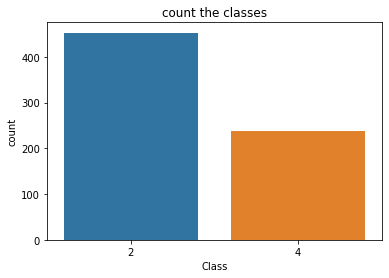

In [13]:
sns.countplot(x='Class', data=df_cancer)
plt.title("count the classes")
plt.show()

In [14]:
count_benign = len(df_cancer[df_cancer['Class']==2])
count_malignant = len(df_cancer[df_cancer['Class']==4])
pct_of_benign = (count_benign/(count_benign+count_malignant))*100
print("percentage of benign", pct_of_benign)
pct_of_malignant = (count_malignant/(count_benign+count_malignant))*100
print("percentage of malignant", pct_of_malignant)

percentage of benign 65.55716353111433
percentage of malignant 34.44283646888567


In [15]:
df_cancer.groupby('Class').mean()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Class,,,,,,,,,,
2,1.108976e+06,2.964680,1.328918,1.448124,1.368653,2.125828,0.406181,2.097130,1.293598,1.064018
4,1.005493e+06,7.210084,6.558824,6.537815,5.596639,5.277311,2.676471,5.983193,5.907563,2.600840


the mean for the following features (clump_thickness, uniformity_of_cess_size, uniformity_of_cell_shape, Marginal_adhesion, single_Epithelial_cell_size, Bare_nuclei, Bland_chromatin, Normal_nucleoli, Mitoses) is higher for malignant

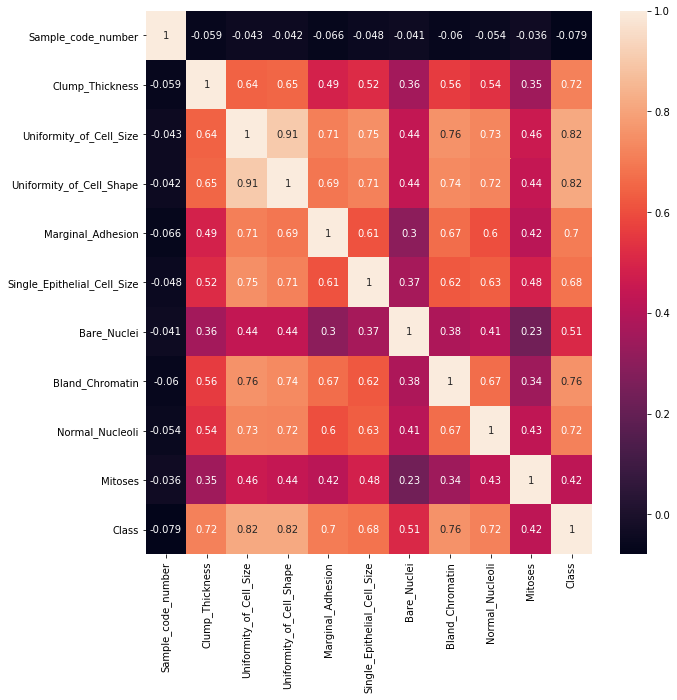

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df_cancer.corr(), annot=True)
plt.show()

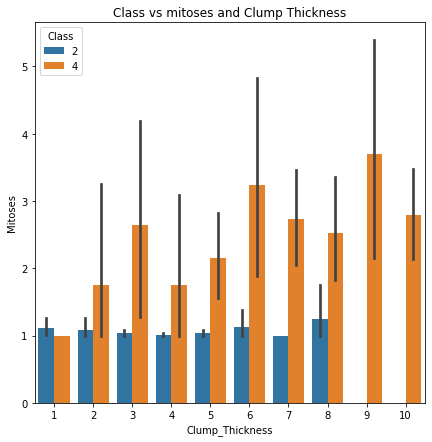

In [17]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.barplot(x='Clump_Thickness', hue='Class',y='Mitoses', data=df_cancer)
plt.title("Class vs mitoses and Clump Thickness")
plt.show()

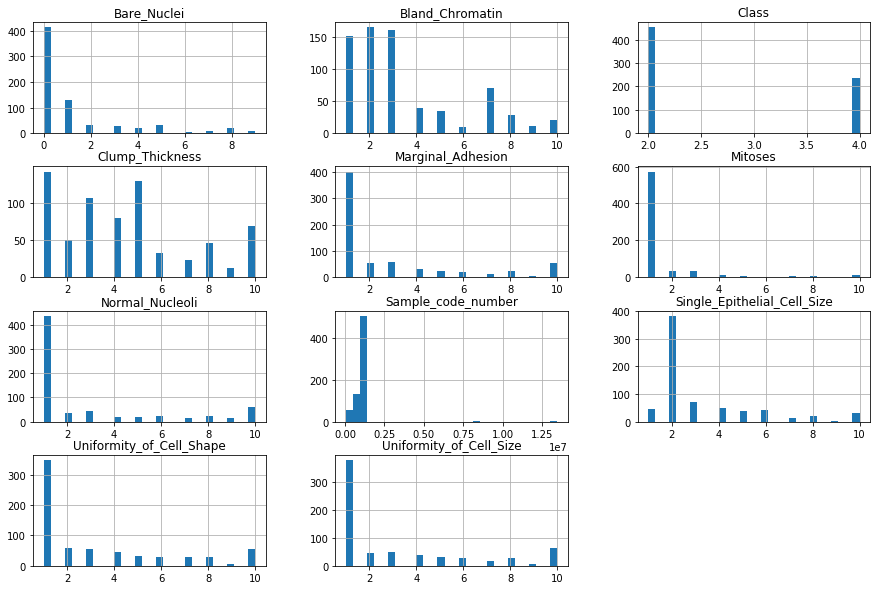

In [18]:
df_cancer.hist(bins=30, figsize=(15, 10))
plt.show()

The following features are highly correlated to class:

* Clump_Thickness
* Uniformity_of_Cell_Size
* Uniformity_of_Cell_Shape
* Marginal_Adhesion
* Single_Epithelial_Cell_Size
* Bare_Nuclei
* Bland_Chromatin
* Normal_Nucleoli

Therefore the remaining features will be dropped

In [19]:
df_cancer.drop(['Mitoses','Sample_code_number'], axis=1, inplace=True)

### splitting data
* Converting DataFrame to Numpy array
* Segregate features and labels into separate variables
* Using sklearn.model_selection 'train_test_split'
* Scaling splitted data 'X_train and X_test'

In [20]:
types={
    2:0,
    4:1
}
df_cancer['Class'] = df_cancer['Class'].map(types)

In [21]:
df_cancer.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Class
0,5,1,1,1,2,0,3,1,0
1,5,4,4,5,7,1,3,2,0
2,3,1,1,1,2,2,3,1,0
3,6,8,8,1,3,4,3,7,0
4,4,1,1,3,2,0,3,1,0


### Hypothesis 
There is no relationship between the X variables and the Y variable meaning the y variables predicted would not be close to the actual y values

In [22]:
from sklearn.model_selection import train_test_split
X = df_cancer.iloc[:,:8] 
y = df_cancer.Class
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [23]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [24]:
import statsmodels.api as sm
multilinear_model = sm.Logit(y,X)
result = multilinear_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.455204
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  691
Model:                          Logit   Df Residuals:                      683
Method:                           MLE   Df Model:                            7
Date:                Wed, 08 Jul 2020   Pseudo R-squ.:                  0.2931
Time:                        14:55:43   Log-Likelihood:                -314.55
converged:                       True   LL-Null:                       -444.96
Covariance Type:            nonrobust   LLR p-value:                 1.377e-52
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Clump_Thickness                -0.2426      0.048     -5.082      0.000      -0.336      -0.149
Uniformity_of_Cell_Size         0.7903      0.116      6.824      0.000       0.563       1.017
Uniformity_of_Cell_Shape        0.2409      0.100      2.411      0.016       0.045       0.437
Marginal_Adhesion               0.2100      0.063      3.343      0.001       0.087       0.333
Single_Epithelial_Cell_Size    -0.7439      0.089     -8.341      0.000      -0.919      -0.569
Bare_Nuclei                     0.2688      0.065      4.125      0.000       0.141       0.396
Bland_Chromatin                -0.3120      0.074     -4.229      0.000      -0.457      -0.167
Normal_Nucleoli                 0.2448      0.066      3.726      0.000       0.116       0.374
===============================================================================================
"""

In [25]:
print(result.pvalues, 'the p-values for all the features is less than 0.05')

Clump_Thickness                3.735879e-07
Uniformity_of_Cell_Size        8.877996e-12
Uniformity_of_Cell_Shape       1.592243e-02
Marginal_Adhesion              8.280290e-04
Single_Epithelial_Cell_Size    7.335632e-17
Bare_Nuclei                    3.703823e-05
Bland_Chromatin                2.346128e-05
Normal_Nucleoli                1.948933e-04
dtype: float64 the p-values for all the features is less than 0.05


In [26]:
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(rescaledX_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]


### Creating model using sklearn.linear_model "LogisticRegression"

In [ ]:
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=1)

# Fit logreg to the train set
model = logreg.fit(rescaledX_train, y_train)
model

In [ ]:
# Use logreg to predict instances from the test set and store it
y_testpred = logreg.predict(rescaledX_test)
# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

# The dataframe for confusion matrix of the logreg model
pd.DataFrame(data=confusion_matrix(y_test, y_testpred), columns= ['Benign', 'Malignant'])

In [ ]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

In [ ]:
print(classification_report(y_test,y_testpred))

In [ ]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = logreg.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()


### Conclusion

The model above is the best since it has 97% precision, 98% recall and 98% f1-score with the accuracy score of 96.96%